In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from numpy.linalg import solve, norm
from tabulate import tabulate

In [2]:
def PageRank(A, p):
    '''
    Calcula o PageRank por meio da
    resolução do sistema linear
    (I - (1 - p) * A) = p/n
    '''
    A = np.array(A, dtype = np.float64)
    for i in range(A.shape[0]):
        soma = sum(A[i, :])
        for j in range(A.shape[1]):
            A[i, j] = A[i, j]/soma
    
    A = A.T
    n = A.shape[1]
    A = np.eye(n, n) - (1 - p) * A
    b = p * (np.ones(n, dtype = np.float64) / n)
    return solve(A, b)

def PageRank2(A, p, tol = 1e-10):
    '''
    Calcula o PageRank pelo método da
    potência, isso é, pega um vetor e
    calcula A^n * v até que ocorra a
    convergência
    '''
    A = np.array(A, dtype = np.float64)
    for i in range(A.shape[0]):
        soma = sum(A[i, :])
        for j in range(A.shape[1]):
            A[i, j] = A[i, j]/soma
            
    n = A.shape[0]
    A = (1 - p) * A + p * np.ones((n, n)) / n
    
    v0 = np.zeros(n, dtype = np.float64)
    v0[0] = 1
    v1 = v0 @ A
    while norm(v1 - v0) > tol:
        v0 = v1
        v1 = v0 @ A
        
    return v1

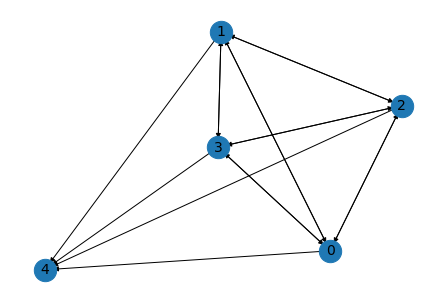

In [3]:
A = np.array([[0, 1, 1, 1, 1],
              [1, 0, 1, 1, 1],
              [1, 1, 0, 1, 1],
              [1, 1, 1, 0, 1],
              [0, 0, 0, 0, 1]])

G = nx.from_numpy_matrix(np.matrix(A), create_using=nx.DiGraph)
layout = nx.spring_layout(G)
labels = [*range(A.shape[0])]
labels = dict(zip(G.nodes, labels))

nx.draw(G, layout)
nx.draw_networkx_nodes(G, layout, node_size = 500)
nx.draw_networkx_labels(G, layout, labels = labels, font_size = 14, font_family = 'sans-serif')
plt.show()

In [4]:
p = 0.1
ranks = PageRank(A, p)
ranks2 = PageRank2(A, p)
all_ranks = [[i, ranks[i], ranks2[i]] for i in range(ranks.shape[0])]
print(tabulate(all_ranks, ['Nó', 'Rank - Sistema', 'Rank - Potência'], tablefmt = 'grid'))

+------+------------------+-------------------+
|   Nó |   Rank - Sistema |   Rank - Potência |
+======+==================+===================+
|    0 |        0.0615385 |         0.0615385 |
+------+------------------+-------------------+
|    1 |        0.0615385 |         0.0615385 |
+------+------------------+-------------------+
|    2 |        0.0615385 |         0.0615385 |
+------+------------------+-------------------+
|    3 |        0.0615385 |         0.0615385 |
+------+------------------+-------------------+
|    4 |        0.753846  |         0.753846  |
+------+------------------+-------------------+
